In [163]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import autoreload
import missingno as msn
import sys
import os
import csv

from collections import defaultdict, Counter

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 100)

sb.set_style("darkgrid")
sb.set()

%matplotlib inline

In [164]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\US-Gun-Violence.csv")
df.head()

,incident_id,incident_date,state,city_or_county,address,killed,injured
0,2128682,September 29 2021,Illinois,Chicago,800 block of N Milwaukee Ave,0,5.0
1,2127374,September 28 2021,Illinois,Chicago,65th St and Calumet Ave,1,3.0
2,2128023,September 28 2021,Minnesota,Minneapolis,2700 block of Bloomington Ave,1,3.0
3,2126747,September 27 2021,New York,New York (Manhattan),3964 10th Ave,0,5.0
4,2126450,September 27 2021,Illinois,Chicago,826 N Ridgeway Ave,1,3.0


#### Dataset Statistical Information

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3230 entries, 0 to 3229
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   incident_id     3230 non-null   int64  
 1   incident_date   3230 non-null   object 
 2   state           3230 non-null   object 
 3   city_or_county  3230 non-null   object 
 4   address         3225 non-null   object 
 5   killed          3230 non-null   int64  
 6   injured         3228 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 176.8+ KB


In [166]:
df.shape

(3230, 7)

In [167]:
df.describe().round()

,incident_id,killed,injured
count,3230.0,3230.0,3228.0
mean,1189816.0,1.0,4.0
std,626938.0,2.0,8.0
min,92194.0,0.0,0.0
25%,610627.0,0.0,3.0
50%,1232031.0,1.0,4.0
75%,1750595.0,1.0,5.0
max,2128682.0,59.0,441.0


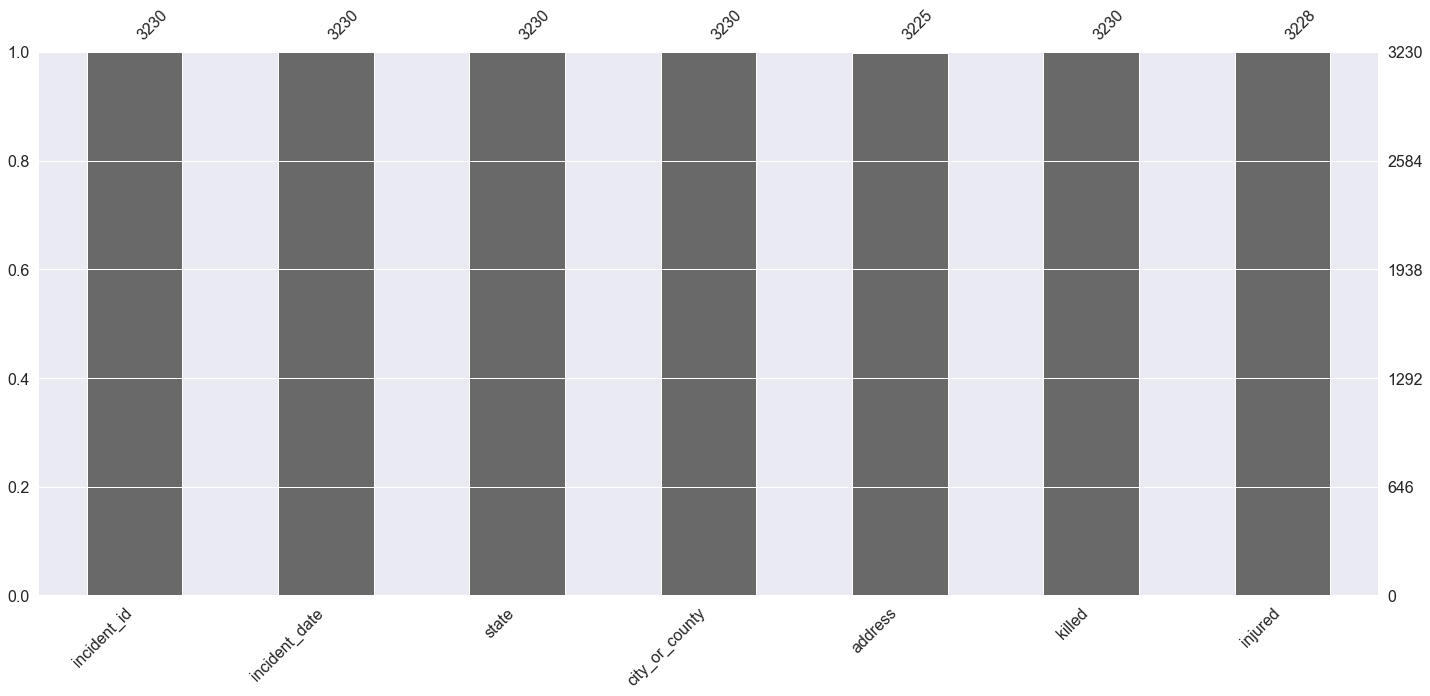

In [168]:
msno.bar(df)

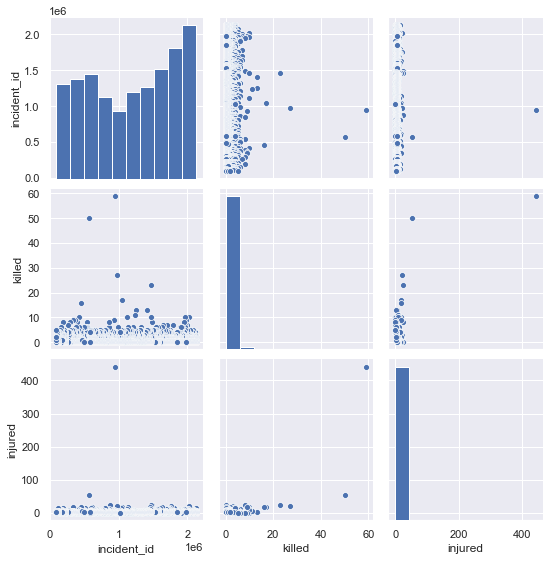

In [169]:
sb.pairplot(df)

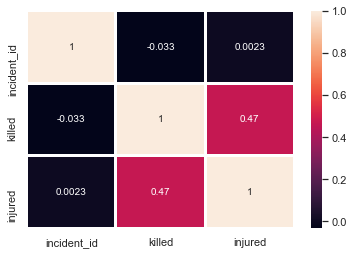

In [170]:
sb.heatmap(df.corr(), annot = True, linewidth = 2)

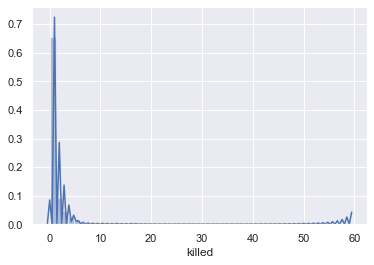

In [171]:
sb.distplot(df["killed"])

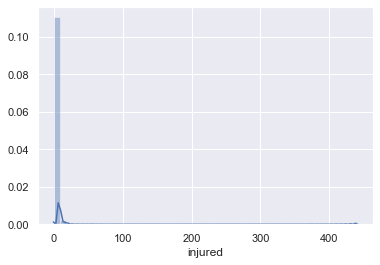

In [172]:
sb.distplot(df["injured"])

In [173]:
df.head()

,incident_id,incident_date,state,city_or_county,address,killed,injured
0,2128682,September 29 2021,Illinois,Chicago,800 block of N Milwaukee Ave,0,5.0
1,2127374,September 28 2021,Illinois,Chicago,65th St and Calumet Ave,1,3.0
2,2128023,September 28 2021,Minnesota,Minneapolis,2700 block of Bloomington Ave,1,3.0
3,2126747,September 27 2021,New York,New York (Manhattan),3964 10th Ave,0,5.0
4,2126450,September 27 2021,Illinois,Chicago,826 N Ridgeway Ave,1,3.0


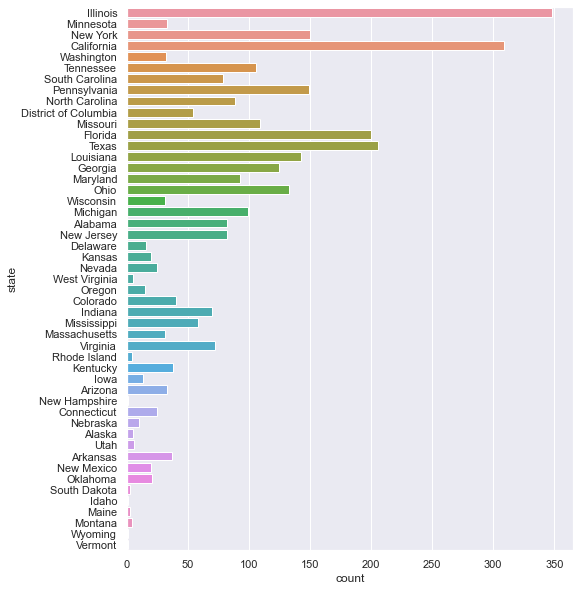

In [174]:

plt.figure(figsize = (8, 10))
state = sb.countplot(y = df["state"])

In [175]:
df["state"].value_counts()

Illinois                348
California              309
Texas                   206
Florida                 200
New York                150
Pennsylvania            149
Louisiana               143
Ohio                    133
Georgia                 125
Missouri                109
Tennessee               106
Michigan                 99
Maryland                 93
North Carolina           89
Alabama                  82
New Jersey               82
South Carolina           79
Virginia                 72
Indiana                  70
Mississippi              58
District of Columbia     54
Colorado                 40
Kentucky                 38
Arkansas                 37
Arizona                  33
Minnesota                33
Washington               32
Wisconsin                31
Massachusetts            31
Nevada                   25
Connecticut              25
Oklahoma                 21
New Mexico               20
Kansas                   20
Delaware                 16
Oregon              

From the above findings, Illinois and Califonia are the leading states with cases concerning police bruality.
Texas, Florida and New York also top the graph.

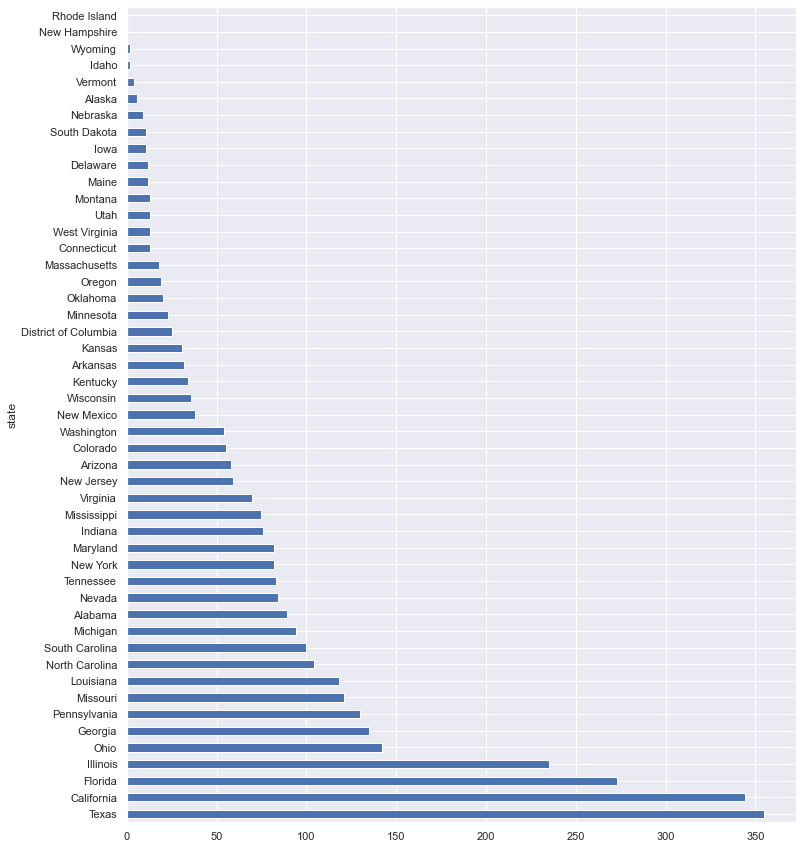

In [176]:
plt.figure(figsize = (12, 15))
kills_per_state = df.groupby("state")
kills_per_state = kills_per_state["killed"].sum().sort_values(ascending = False).plot(kind = 'barh')

Texas, Calofornia, Florida and Illinois recorded the highest number of killing respectively between  2014 - 2021

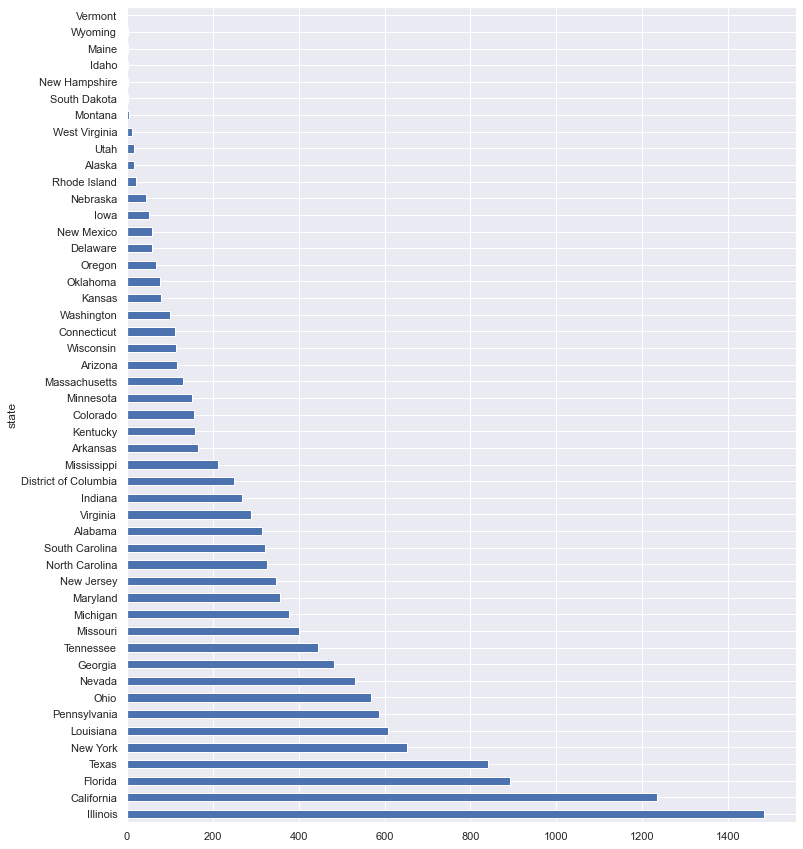

In [177]:
plt.figure(figsize = (12, 15))
injuries_per_state = df.groupby("state")
injuries_per_state = injuries_per_state["injured"].sum().sort_values(ascending = False).plot(kind = "barh")

In [178]:
df.head()

,incident_id,incident_date,state,city_or_county,address,killed,injured
0,2128682,September 29 2021,Illinois,Chicago,800 block of N Milwaukee Ave,0,5.0
1,2127374,September 28 2021,Illinois,Chicago,65th St and Calumet Ave,1,3.0
2,2128023,September 28 2021,Minnesota,Minneapolis,2700 block of Bloomington Ave,1,3.0
3,2126747,September 27 2021,New York,New York (Manhattan),3964 10th Ave,0,5.0
4,2126450,September 27 2021,Illinois,Chicago,826 N Ridgeway Ave,1,3.0


In [224]:
df2 = df.copy()

In [225]:
df2.head()

,incident_id,incident_date,state,city_or_county,address,killed,injured
0,2128682,September 29 2021,Illinois,Chicago,800 block of N Milwaukee Ave,0,5.0
1,2127374,September 28 2021,Illinois,Chicago,65th St and Calumet Ave,1,3.0
2,2128023,September 28 2021,Minnesota,Minneapolis,2700 block of Bloomington Ave,1,3.0
3,2126747,September 27 2021,New York,New York (Manhattan),3964 10th Ave,0,5.0
4,2126450,September 27 2021,Illinois,Chicago,826 N Ridgeway Ave,1,3.0


In [226]:
df2["incident_date"] = pd.to_datetime(df2["incident_date"])
df2.head()

,incident_id,incident_date,state,city_or_county,address,killed,injured
0,2128682,2021-09-29,Illinois,Chicago,800 block of N Milwaukee Ave,0,5.0
1,2127374,2021-09-28,Illinois,Chicago,65th St and Calumet Ave,1,3.0
2,2128023,2021-09-28,Minnesota,Minneapolis,2700 block of Bloomington Ave,1,3.0
3,2126747,2021-09-27,New York,New York (Manhattan),3964 10th Ave,0,5.0
4,2126450,2021-09-27,Illinois,Chicago,826 N Ridgeway Ave,1,3.0


In [227]:
df2["weekday"] = df2["incident_date"].dt.day_name()

In [228]:
df2.set_index(df["incident_date"])

,incident_id,incident_date,state,city_or_county,address,killed,injured,weekday
incident_date,,,,,,,,
September 29 2021,2128682,2021-09-29,Illinois,Chicago,800 block of N Milwaukee Ave,0,5.0,Wednesday
September 28 2021,2127374,2021-09-28,Illinois,Chicago,65th St and Calumet Ave,1,3.0,Tuesday
September 28 2021,2128023,2021-09-28,Minnesota,Minneapolis,2700 block of Bloomington Ave,1,3.0,Tuesday
September 27 2021,2126747,2021-09-27,New York,New York (Manhattan),3964 10th Ave,0,5.0,Monday
September 27 2021,2126450,2021-09-27,Illinois,Chicago,826 N Ridgeway Ave,1,3.0,Monday
...,...,...,...,...,...,...,...,...
January 12 2014,95550,2014-01-12,Alabama,Huntsville,University Drive,0,5.0,Sunday
January 11 2014,95146,2014-01-11,Mississippi,Jackson,3430 W. Capitol Street,0,4.0,Saturday
January 5 2014,94514,2014-01-05,Pennsylvania,Erie,829 Parade St,1,3.0,Sunday


In [229]:
df2.head()

,incident_id,incident_date,state,city_or_county,address,killed,injured,weekday
0,2128682,2021-09-29,Illinois,Chicago,800 block of N Milwaukee Ave,0,5.0,Wednesday
1,2127374,2021-09-28,Illinois,Chicago,65th St and Calumet Ave,1,3.0,Tuesday
2,2128023,2021-09-28,Minnesota,Minneapolis,2700 block of Bloomington Ave,1,3.0,Tuesday
3,2126747,2021-09-27,New York,New York (Manhattan),3964 10th Ave,0,5.0,Monday
4,2126450,2021-09-27,Illinois,Chicago,826 N Ridgeway Ave,1,3.0,Monday


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

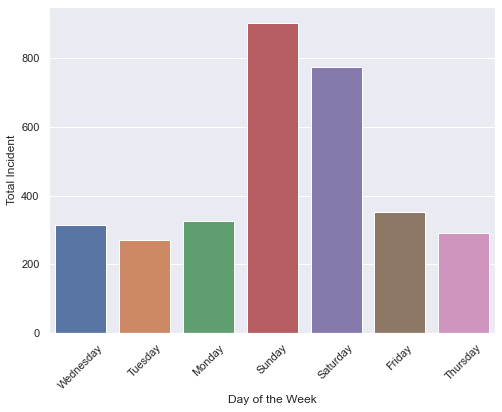

In [230]:
plt.figure(figsize = (8, 6))
sb.countplot(df2["weekday"])
plt.ylabel("Total Incident")
plt.xlabel("Day of the Week")
plt.xticks(rotation = 45)

In [231]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3230 entries, 0 to 3229
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   incident_id     3230 non-null   int64         
 1   incident_date   3230 non-null   datetime64[ns]
 2   state           3230 non-null   object        
 3   city_or_county  3230 non-null   object        
 4   address         3225 non-null   object        
 5   killed          3230 non-null   int64         
 6   injured         3228 non-null   float64       
 7   weekday         3230 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 202.0+ KB


In [232]:
df2["incident_date"] = pd.to_datetime(df2["incident_date"])
df2.head()

,incident_id,incident_date,state,city_or_county,address,killed,injured,weekday
0,2128682,2021-09-29,Illinois,Chicago,800 block of N Milwaukee Ave,0,5.0,Wednesday
1,2127374,2021-09-28,Illinois,Chicago,65th St and Calumet Ave,1,3.0,Tuesday
2,2128023,2021-09-28,Minnesota,Minneapolis,2700 block of Bloomington Ave,1,3.0,Tuesday
3,2126747,2021-09-27,New York,New York (Manhattan),3964 10th Ave,0,5.0,Monday
4,2126450,2021-09-27,Illinois,Chicago,826 N Ridgeway Ave,1,3.0,Monday
